# Python for Data Analysis

Book:
http://wesmckinney.com/pages/book.html

GitHub:
https://github.com/wesm/pydata-book

## 0. Terminology

* Time series: a series of data points listed in time order
* Data munging/wrangling/munge: transforming messy data into a structured format for processing
* Element-wise: perform on every element (e.g., in an array)
* Quantile: A sample divided into equal-sized parts. E.g., a percentile is a quantile that divides a distribution into 100-equal sized parts.

## 1. Libraries Overview

* NumPy
    * `ndarray` -- fast multidimensional array
    * C interop
    * Linear algebra operations
    * More efficient arrays
    
    
* pandas
    * High-level data structures for working with structured data
    * In particular `DataFrame` and `Series`
    
    
* matplotlib
    * Produces plots and other 2D data visulizations
    
    
* scipi
    * Various scientific computing functions
    * E.g., statistical tests, etc.
    
    
* scikit-learn
    * General-purpose machine learning
    
    
* statsmodels
    * Classical statistics and econometric algorithms
    


## 2. Import conventions
It's bad practice to import everything, like:
`from numpy import *`

This will take in a huge package (snigger).

Instead, the following import conventions are used:

    * `import numpy as np`
    * `import matplotlib.pyplot as plt`
    * `import pandas as pd`
    * `import seaborn as sns`
    * `import statsmodel as sm`
    
This allows you to call, say, `np.arange`, so you can clearly see `.arange` is coming from the `np` package.

## 3. Python Reminder/Tips
This section just contains some points that weren't covered in the previous Python tutorial.

### 3.1 Object Introspection

In [39]:
# Use ? to find out information about an object,
# or to show a function's docstring

my_list = [1, 2, 3]

my_list?

my_list.insert?

### 3.2 %run/%load
Use %run or %load (Jupyter) to run a .py script.

In [10]:
# %run test_script.py

# %load test_script.py

### 3.3 Magic Commands
Magic commands are special IPython commands not available in Python itself.

They are prefixed by %.

E.g., `%timeit`

You can use ? with these commands too.

Use the following to get a list of magic commands:

`%quickref`
`%magic`

In [15]:
# Enter debugger
%debug?

# Delete all defined variables/names
%reset

# Pretty-print the object and display it via pager
%page OBJECT

# Delete a variable and attempt to clear al references to it
%xdel VARIABLE

# Let's you see matplotlibs in Jupyter
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
Object `OBJECT` not found
NameError: name 'VARIABLE' is not defined
Using matplotlib backend: MacOSX


ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x10e7e2f28>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'


### 3.4 matplotlib in Jupyter

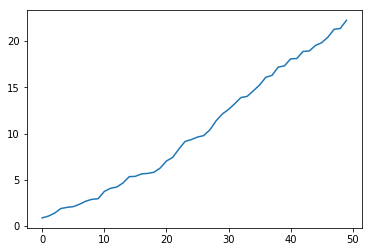

In [17]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(np.random.rand(50).cumsum())

### 3.5 Keyword Arguments
Functions can take keyword arguments.

In [22]:
def my_func(x, y, z):
    print("x is {}, y is {}, and z is {}".format(x, y, z))
    
my_func(x=3, z=10, y = 2)

x is 3, y is 2, and z is 10


### 3.6 Binding
Assigning is sometimes referred to as __binding__, and variables that have been assigned may be referred to as __bound variables__.

### 3.7 Checking conformity
As well as using isinstance, you can define a function to check if something implements a certain protocol, throwing an error if it does not.

In [26]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False

x = 5

if not isinstance(x, list) and isiterable(x):
    x = list(x)
    
print(x)

5


### 3.8 Scalar Value Types
I.e., primitive types

* None
* str
* bytes
* float
* bool
* int

### 3.9 Interpret characters as-is
Use r before the string. (I.e., don't interpret the characters as escape characters.) Like @ in C#.

In [28]:
my_str = r"this string\does not contain\special characters."

print(my_str)

this string\does not contain\special characters.


### 3.10 Printing readable date strings
Use `.strftime(...)`.

In [33]:
from datetime import datetime, date, time

dt = datetime(2017, 1, 21, 20, 30, 21)
dt.strftime('%m/%d/%y %H:%M')

'01/21/17 20:30'

### 3.12 Extracting variables
When unpacking variables, you can use the `*rest` keyword to get the remaining arguments. Note, rest here is just an example and can be anything, such as an underscore (_).

In [35]:
my_list = 1, 2, 3, 4, 5

a, b, *rest = my_list

print(a, b)

print(rest)

1 2
[3, 4, 5]


### 3.13 Sort Keys

In [38]:
my_list = ["he", "ate", "a", "great", "hotdog"]

my_list.sort(key=len)

print(my_list)

['a', 'he', 'ate', 'great', 'hotdog']


### 3.14 Understanding nested comprehension
This is just a nice example.

In [3]:
some_tuples = ((1,2,3),(4,5,6),(7,8,9))

flattened = [x for tup in some_tuples for x in tup]

print(flattened)

# This is the same as:

flattened = []

for tup in some_tuples:
    for x in tup:
        flattened.append(x)
        
print(flattened)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 3.15 Using a list of functions to clean strings 

In [8]:
import re

# Just another nice example
def remove_punctuation(str):
    return re.sub("[!#?]", "", str)
                  
                  
def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result
                  
states = ["    alabama", "Georgia!", "West Virginia?  "]
clean_ops = [str.strip, remove_punctuation, str.title]              
    
clean_strings(states, clean_ops)

['Alabama', 'Georgia', 'West Virginia']

### 3.16 itertools
The `itertools` module has a collection for generators, such as groupby, combinations, etc. Similar to LINQ statements in C#.

In [14]:
import itertools

first_letter = lambda x: x[0]

names = ["Adam", "Alan", "Jennifer", "Josie", "James"]

for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names)) # Names is a generator

('A', ['Adam', 'Alan'])
('J', ['Jennifer', 'Josie', 'James'])


## 2. NumPy Basics

A few points about NumPy:
    
* Data is stored in a contiguous block in memory
* NumPy's algorithms written in C can operate on this without type checking
* NumPy arrays use less memory than built-in Python sequences



In [3]:
# Here's a comparison

import numpy as np

np_array = np.arange(1000000)

python_list = list(range(1000000))


%time for _ in range(10): np_array2 = np_array * 2
    
%time for _ in range(10): python_list2 = [x * 2 for x in python_list]

Wall time: 26 ms
Wall time: 1.13 s


And numpy arrays use less memory too.

### 2.1 ndarray
ndarray is a fast, N-dimensional array object.
You can perform mathematical operations on the every element with similar syntax to that you would use with scalar elements (e.g., above where we could just do `array * 2` to multiply every element in the array by 2, instead of needing a for composition).

Every element in ndarray must be of the same type.

In [4]:
# Here is a 2 by 3 array with random data.

import numpy as np

random_two_by_three = np.random.randn(2, 3)

random_two_by_three

array([[ 1.47636454,  0.58560396,  0.08390403],
       [ 1.39940735, -0.60260737,  0.85310421]])

In [7]:
# I can then multiply every element by 10
random_two_by_three * 10

array([[ 14.76364544,   5.85603959,   0.83904029],
       [ 13.99407348,  -6.02607369,   8.53104209]])

In [8]:
# Or add it with something else, like itself
random_two_by_three + random_two_by_three

array([[ 2.95272909,  1.17120792,  0.16780806],
       [ 2.7988147 , -1.20521474,  1.70620842]])

In [16]:
# Use shape to get the rows/columns of the array
print(random_two_by_three.shape)

# Use ndim to get the dimensions
print(random_two_by_three.ndim)

# And use dtype to get the data type stored in the array
print(random_two_by_three.dtype)

(2L, 3L)
2
float64


#### 2.1.1 Creating ndarrays

In [13]:
# 1. Use the array function
my_data = [1, 2, 3, 4, 5]

my_np_arr = np.array(my_data)

my_np_arr

array([1, 2, 3, 4, 5])

In [15]:
# 2. Nested sequences will be converted into multidimensional arrays
nested_sequence = [[1, 2, 3], [4, 5, 6]]

np_arr = np.array(nested_sequence)

np_arr

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
# 3. Use other functions like zeros, one, or empty to create arrays with these default values.
#    Pass in tuples with dimensions as arguments.
multi_dim_zero_array = np.zeros((3, 3))

print(multi_dim_zero_array)

identity = np.identity(3) # Note, just a single argument

print(identity)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [23]:
# 4. arange is like Python's range function, but it passes back an np array instead of a list
aranged_arr = np.arange(10)

aranged_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# 5. "like" functions create an ndarray with the same shape and type
nested_sequence = [[1, 2, 3], [4, 5, 6]]
np_arr = np.array(nested_sequence)

print(np_arr)

like_arr = np.ones_like(np_arr)

print(like_arr)

[[1 2 3]
 [4 5 6]]
[[1 1 1]
 [1 1 1]]


In [39]:
# 6. Fill an array FULL of values
filled_arr = np.full((2, 3), 6)

filled_arr

array([[6, 6, 6],
       [6, 6, 6]])

#### 2.1.2 ndarray data types

In [42]:
# 1. Cast an array of strings to floats
number_strings = np.array(["2.64", "1.43", "5.6"], dtype=np.string_)

float_arr = number_strings.astype(float)

float_arr

array([ 2.64,  1.43,  5.6 ])

#### 2.1.3 NumPy array arithmetic
You can perform arithmetic operations on arrays without writing for loops.

In NumPy, this is called __vectorization__. (Specifically, vectorization refers to using some array expression to accomplish your task, instead of writing a for loop.)

In [46]:
arr = np.array([[1, 2, 3,], [4, 5, 6]])

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
arr * 3

array([[ 3,  6,  9],
       [12, 15, 18]])

In [50]:
arr + arr

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [51]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [53]:
1.0/arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [54]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

In [57]:
# You can also use Boolean operations, which will compare each element in the array
arr2 = np.array([[1, 5, 2], [2, 7, 9]])

arr2 < arr

array([[False, False,  True],
       [ True, False, False]], dtype=bool)

#### 2.1.4 Indexing and slicing
If you take a slice of an array and assign a scalar value to it, this is known as __broadcasting__. The value is __broadcasted__ to that slice.

In [59]:
# Broadcasting example
arr = np.arange(10)

arr[4:6] = 9

arr

array([0, 1, 2, 3, 9, 9, 6, 7, 8, 9])

Important difference:
When you take a slice of an ndarray, the slice refers to the original array elements.
The data is NOT copied.

This slice is known as a __view__.

In [69]:
arr = np.arange(10)

# Take a slice
my_slice = arr[0:5]

print(my_slice)

# Change the first element of my slice
my_slice[0] = 10

# The change is reflected in the original array
print(arr)

# Or we could change every value in this slice
my_slice[:] = 1

print(arr)

[0 1 2 3 4]
[10  1  2  3  4  5  6  7  8  9]
[1 1 1 1 1 5 6 7 8 9]


In [70]:
# But if you want, you CAN take a copy too.
my_slice = arr[8:10].copy()

my_slice[:] = 0

print(my_slice)
print(arr)

[0 0]
[1 1 1 1 1 5 6 7 8 9]


In [74]:
# 2D arrays can be accessed using the usual [][] syntax, or by commas
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr)

print(arr[0][1]) # ==
print(arr[0, 1])

[[1 2 3]
 [4 5 6]]
2
2


In [79]:
# Note on multidimensional arrays.
# We can also get, say, 2 x 2 x 3 arrays. This means an 2 (2 by 3) arrays.
higher_dim_arr = np.array([[[1, 2, 3], [4, 5, 6]], [[3, 2, 1], [6, 5, 3]]])

print(higher_dim_arr)

# So calling just one index will get you the first array
print(higher_dim_arr[0])

# And you can assign values to just this
higher_dim_arr[0] = 1

print(higher_dim_arr)

[[[1 2 3]
  [4 5 6]]

 [[3 2 1]
  [6 5 3]]]
[[1 2 3]
 [4 5 6]]
[[[1 1 1]
  [1 1 1]]

 [[3 2 1]
  [6 5 3]]]


#### Slicing in 2D
Slicing in 2D is pretty logical. You just have to remember the syntax.

In [83]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr2d)

slice2d = arr2d[:2] # Take first 2 rows (up to row index at 2 -- the 3rd row)

print(slice2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [90]:
# First arg = select all rows, second arg: select up to column 1
col1 = arr2d[:, :1]
print(col1)

# Take from row 1, up to col 2 (the third col)
sub_arr = arr2d[1:, :2]
print(sub_arr)

[[1]
 [4]
 [7]]
[[4 5]
 [7 8]]


#### 2.1.5 Boolean indexing
We can use a Boolean condition to select array indices.

Suppose we had some names and an array of data.
And imagine every row in the array corresponds to one of the names.

In [92]:
# Array of names
names = np.array(["Bob", "James", "Tim", "Sally", "Trish", "Sara", "Jesse"])

data = np.random.randn(7, 4)

print(names)
print(data)

['Bob' 'James' 'Tim' 'Sally' 'Trish' 'Sara' 'Jesse']
[[-0.74976441 -1.44286506 -0.49599846 -1.28430698]
 [ 0.21163118 -0.31702432  1.02055599  0.12360032]
 [ 0.02082039 -1.94356852 -0.92712085  0.57247121]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [-0.42728919 -1.88049417  1.26696286 -0.00519333]
 [-0.74430498  2.00097006 -0.10675513  0.72826767]
 [-1.41578149  1.30536751  0.12695225 -1.89775707]]


In [94]:
# We can then get the elements/index of the array that correspond to a certain name
# I.e., the True is in index 2, where Tim is.
names == "Tim"

array([False, False,  True, False, False, False, False], dtype=bool)

In [96]:
# So, we can pass this into data, to get Tim's corresponding row
# I.e., get the index of names that corresponds to Tim, and then pass this into data
data[names == "Tim"]

array([[ 0.02082039, -1.94356852, -0.92712085,  0.57247121]])

In [98]:
# You could also combine this to get a certain column/columns with slicing
data[names == "Tim", 3]

array([ 0.57247121])

In [100]:
# Likewise, you can negate the condition using != or ~ to get everything EXCEPT Tim's data
data[~(names == "Tim")]

array([[-0.74976441, -1.44286506, -0.49599846, -1.28430698],
       [ 0.21163118, -0.31702432,  1.02055599,  0.12360032],
       [ 1.85835009,  1.66578352,  0.50968336,  1.26967872],
       [-0.42728919, -1.88049417,  1.26696286, -0.00519333],
       [-0.74430498,  2.00097006, -0.10675513,  0.72826767],
       [-1.41578149,  1.30536751,  0.12695225, -1.89775707]])

__Note:__ `and` and `or` won't work with Boolean indexing. Using `&` and `|` instead:

In [102]:
data[(names == "Tim") | (names == "Sara")]

array([[ 0.02082039, -1.94356852, -0.92712085,  0.57247121],
       [-0.74430498,  2.00097006, -0.10675513,  0.72826767]])

__Note:__ Selecting array elements using Boolean conditionals ALWAYS creates a copy of the data.

In [105]:
# We can also use Boolean conditionals to set data
# E.g., floor to 0
data[data < 0] = 0

print(data)

[[ 0.          0.          0.          0.        ]
 [ 0.21163118  0.          1.02055599  0.12360032]
 [ 0.02082039  0.          0.          0.57247121]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [ 0.          0.          1.26696286  0.        ]
 [ 0.          2.00097006  0.          0.72826767]
 [ 0.          1.30536751  0.12695225  0.        ]]


In [107]:
# Or to set values for a user
data[names == "Tim"] = 7

print(data)

[[ 0.          0.          0.          0.        ]
 [ 0.21163118  0.          1.02055599  0.12360032]
 [ 7.          7.          7.          7.        ]
 [ 1.85835009  1.66578352  0.50968336  1.26967872]
 [ 0.          0.          1.26696286  0.        ]
 [ 0.          2.00097006  0.          0.72826767]
 [ 0.          1.30536751  0.12695225  0.        ]]


#### 2.1.6 Fancy indexing
_fancy indexing_ refers to indexing using an integer array.

Fancy indexing will always return a 1D array.

Like Boolean indexing, fancy indexing will always create a copy of the data.

In [110]:
# Take an array like this:
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i
    
print(arr)

[[ 0.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 2.  2.  2.  2.]
 [ 3.  3.  3.  3.]
 [ 4.  4.  4.  4.]
 [ 5.  5.  5.  5.]
 [ 6.  6.  6.  6.]
 [ 7.  7.  7.  7.]]


In [112]:
# Then we can use fancy indexing to select a subset of rows in a particular order.
# E.g., to select 6 and 3:
subset = arr[[6, 3]]

print(subset)

[[ 6.  6.  6.  6.]
 [ 3.  3.  3.  3.]]


In [113]:
# reshape -- change the dimension of an array
arr = np.arange(32).reshape((8, 4))

print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [117]:
# If you pass in two arrays, you get back a 1D array where the first array specifies the row, and the second the column.
arr1d = arr[[0, 7], [3, 0]]

# 3 = [0,3]
# 4 = [7,0]
print(arr1d)

[ 3 28]


#### 2.1.7 Transposing
Arrays have a `transpose` method and a `T` attribute.

In [154]:
arr = np.arange(15).reshape(3, 5)

print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [148]:
# Get the transpose
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [149]:
# Just accessing the parameter doesn't affect the underlying array, obviously.
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [157]:
# Higher dimension arrays can also be transposed
# (2 2x4 matrices)
arr = np.arange(16).reshape(2, 2, 4)
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [158]:
# Swap the axes within the arrays
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [159]:
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [161]:
# Transpose is a bit more complex in higher dimensions
arr = np.arange(16).reshape(2, 2, 4)
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


In [163]:
# Here, we feed in how we want to permute the axes.
# For example, if we think of our axes as (x, y, z). I.e., the x = matrix to choose, y = row to choose, z = column to choose
# Then, (0, 1, 0) = 4 in our original matrix.
# Now, into transpose we pass (1, 0, 2). It's like saying, make (x, y, z) into (y, x, z)
# So (0, 1, 0) = 4, means 4 changes to position (1, 0, 0) -- second matrix, first row, first col.
# Whew!
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### 2.2 Universal functions
Aka `ufunc`.

These functions vectorize -- perform some operation on all of the elements without needing a for loop -- on all the elements in an array.

There are two types:

* Unary functions: operate on one array
* Binary functions: operate on two arrays

List of available ufuncs: https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#available-ufuncs

In [165]:
arr = np.arange(10)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [166]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [168]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [169]:
x = np.array([1, 2, 4])

y = np.array([3, 1, 2])

np.maximum(x, y)

array([3, 2, 4])

In [174]:
# Ufuncs can take an out parameter to operate on the array in-place

arr = np.array([1.0, 2.0, 3.0])
np.sqrt(arr)

print(arr)

np.sqrt(arr, arr)
print(arr)

[ 1.  2.  3.]
[ 1.          1.41421356  1.73205081]


### 2.3 Array-Oriented Programming
With NumPy, we can often replace for loops with some concise array expression.
In other words, we can perform _vectorization_ -- replacing for loops with some array expression.

In [198]:
# To look at this example, we must understand meshgrid.
# Meshgrid takes 2 1D arrays and turns them into a grid.
# This would be a 10x5 grid.
x_points = np.arange(10)
y_points = np.arange(5)

print(x_points)
print(y_points)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


In [199]:
# Get all the x points and y points
xs, ys = np.meshgrid(x_points, y_points)

In [200]:
# 5 rows of 10 dots (5 = y dimension)
xs

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [201]:
# 10 columns of 5 dots (10 = x dimension)
ys

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

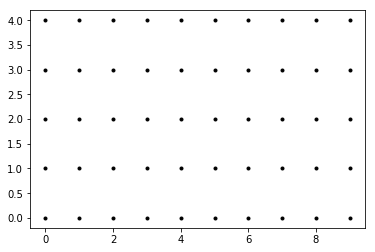

In [192]:
# If we draw it, it looks like this:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs,ys, marker='.', color='k', linestyle='none')

In [204]:
# Now, if we wanted to find sqrt(x^2 + y^2), we just do:
z = np.sqrt(xs^2 + ys^2)

print(z)

# The point is, we did it all using array operations -- there were no for loops.

[[ 0.          1.          1.41421356  1.73205081  2.          2.23606798
   2.44948974  2.64575131  2.82842712  3.        ]
 [ 1.          0.          1.73205081  1.41421356  2.23606798  2.
   2.64575131  2.44948974  3.          2.82842712]
 [ 2.44948974  2.64575131  2.          2.23606798  1.41421356  1.73205081
   0.          1.          3.74165739  3.87298335]
 [ 2.64575131  2.44948974  2.23606798  2.          1.73205081  1.41421356
   1.          0.          3.87298335  3.74165739]
 [ 2.          2.23606798  2.44948974  2.64575131  0.          1.
   1.41421356  1.73205081  3.46410162  3.60555128]]


In [207]:
# The where condition can be used to get filtered data
x_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_arr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

conditions = np.array([True, True, False, False, True])

# If True, take from x_arr, else, take from y_arr
result = np.where(conditions, x_arr, y_arr)

result

array([ 1.1,  1.2,  2.3,  2.4,  1.5])

In [210]:
# Another where example: imagine we wanted everything -ve to be -2, and everything +ve to be 2.

arr = np.random.randn(4, 4)
arr

array([[-0.72923974, -2.03837278, -0.96654509,  1.7903514 ],
       [ 0.82098975, -0.24916209, -0.28642331,  0.99524732],
       [ 2.27167346, -1.06800021,  0.15132695,  1.17992048],
       [-0.86194962, -1.3309561 , -0.66236043, -1.05764893]])

In [211]:
result = np.where(arr > 0, 2, -2)

result

array([[-2, -2, -2,  2],
       [ 2, -2, -2,  2],
       [ 2, -2,  2,  2],
       [-2, -2, -2, -2]])

In [212]:
# What if I only wanted to replace the positive values, and leave the rest alone?
# In this case, we can just pass in the array to the "else" part of the statement
arr = np.random.randn(4, 4)
arr

array([[ -2.62141956e-01,   3.63206390e-01,   1.58499414e-03,
         -8.20037558e-01],
       [ -5.20998062e-01,   1.38604317e+00,   3.56671927e-02,
          9.88523190e-01],
       [ -2.24099800e-02,   6.25422700e-01,  -6.15655484e-01,
         -1.50033677e+00],
       [  3.85942154e-01,   6.82148328e-01,   2.17148487e+00,
         -1.91187563e-01]])

In [213]:
result = np.where(arr > 0, 2, arr)
result

array([[-0.26214196,  2.        ,  2.        , -0.82003756],
       [-0.52099806,  2.        ,  2.        ,  2.        ],
       [-0.02240998,  2.        , -0.61565548, -1.50033677],
       [ 2.        ,  2.        ,  2.        , -0.19118756]])

#### 2.3.1 Mathematical & statistical methods

In [214]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [215]:
arr.mean()

4.5

In [216]:
arr.sum()

45

In [218]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [221]:
# Supply an axis argument to get the sum of each row in another, 1D, array
arr.sum(axis=1)

array([ 3, 12, 21])

In [223]:
# Or we could do axis=0 to sum the columns
arr.sum(axis=0)

array([ 9, 12, 15])

Slightly confusing reversal of the row/column standard. For clarity:

* `axis=0` == compute down the rows (i.e., the columns)
* `axis=1` == computer across the columns (i.e., the rows)

#### 2.3.2 Sorting
You can sort an axis of a multdimensional array by passing an axis into sort.

In [224]:
arr = np.random.randn(4, 4)
arr

array([[ 0.67985615,  0.4467615 ,  0.98179096,  0.89242437],
       [ 0.0086968 ,  0.9241127 ,  0.59112928,  0.93030476],
       [ 0.82821186,  0.38144211,  0.23559007,  1.36495571],
       [ 0.30221386,  0.12111979, -0.25221855,  0.22984603]])

In [227]:
# Sort across the columns
arr.sort(1)
arr

array([[ 0.4467615 ,  0.67985615,  0.89242437,  0.98179096],
       [ 0.0086968 ,  0.59112928,  0.9241127 ,  0.93030476],
       [ 0.23559007,  0.38144211,  0.82821186,  1.36495571],
       [-0.25221855,  0.12111979,  0.22984603,  0.30221386]])

In [228]:
arr = np.random.randn(4, 4)
arr

array([[ 0.51275434, -0.39658362, -0.18785255,  0.78905677],
       [ 0.18243359, -0.10371522,  0.41654519, -1.25773565],
       [-0.2898797 , -1.60171387, -0.19392922, -1.61828443],
       [ 0.65298619, -1.42323186, -1.90427449, -1.56585265]])

In [230]:
# Sort down the rows
arr.sort(0)
arr

array([[-0.2898797 , -1.60171387, -1.90427449, -1.61828443],
       [ 0.18243359, -1.42323186, -0.19392922, -1.56585265],
       [ 0.51275434, -0.39658362, -0.18785255, -1.25773565],
       [ 0.65298619, -0.10371522,  0.41654519,  0.78905677]])

#### 2.3.3 Unique & Other set logic

In [232]:
# np.unique returns the sorted, unique values in an array.
names = np.array(["Tim", "Bob", "Bob", "Stewart", "Linda", "Steven", "Sara", "Alberta", "Steven"])

result = np.unique(names)

result

array(['Alberta', 'Bob', 'Linda', 'Sara', 'Steven', 'Stewart', 'Tim'],
      dtype='|S7')

In [233]:
# in1d tells you if the element belongs to some other array
arr = np.array([1, 0, 0, 7, 21, 5, 3, 2, 21])

np.in1d(arr, [7, 3, 1])

array([ True, False, False,  True, False, False,  True, False, False], dtype=bool)